# ENERGY CONSUMPTION DATASET
#### This dataset is designed for predicting energy consumption based on various building features and environmental factors. It contains data for multiple building types, square footage, the number of occupants, appliances used, average temperature and the day of the week. The goal is to build a predictive model to estimate energy consumption using these attributes. The dataset can be used for training machine learning models to forecast energy needs based on the building's characteristics. This is useful for understanding energy demand patterns and optimizing energy consumption in different building types and environmental conditions.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score

### Import Data

In [2]:
df = pd.read_csv("E:\DataScience\ML\ML_Project_1(on_regression)\EnergyConsumption_dataset.csv")
data = pd.DataFrame(df)
print(data)

   Building Type  Square Footage  Number of Occupants  Appliances Used  \
0    Residential           24563                   15                4   
1     Commercial           27583                   56               23   
2     Commercial           45313                    4               44   
3    Residential           41625                   84               17   
4    Residential           36720                   58               47   
..           ...             ...                  ...              ...   
95    Commercial            1161                   81               11   
96   Residential           37943                   50               23   
97    Commercial            1558                   27               29   
98    Industrial            2145                   56               12   
99   Residential           42414                   72               24   

    Average Temperature Day of Week  Energy Consumption  
0                 28.52     Weekday             2865.

### Basic Information

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


### Data Cleaning

#### Rename Attributes

In [4]:
data.rename(columns = {'Building Type':'build_type', 'Square Footage':'sq_footage', 'Number of Occupants':'no_of_occupants', 
                       'Appliances Used':'no_of_applianc_used', 'Average Temperature':'avg_temp','Day of Week':'day_of_week', 'Energy Consumption':'energy_consmp'}, inplace = True)

#### Check Null Values

In [5]:
print(data.isna().sum())        # no null values

build_type             0
sq_footage             0
no_of_occupants        0
no_of_applianc_used    0
avg_temp               0
day_of_week            0
energy_consmp          0
dtype: int64


#### Check Duplicates

In [6]:
print(data.duplicated())           # no duplicates

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


### Encoding Categorial Data

In [7]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

    build_type  sq_footage  no_of_occupants  no_of_applianc_used  avg_temp  \
0            2       24563               15                    4     28.52   
1            0       27583               56                   23     23.07   
2            0       45313                4                   44     33.56   
3            2       41625               84                   17     27.39   
4            2       36720               58                   47     17.08   
..         ...         ...              ...                  ...       ...   
95           0        1161               81                   11     15.45   
96           2       37943               50                   23     21.73   
97           0        1558               27                   29     16.86   
98           1        2145               56                   12     11.77   
99           2       42414               72                   24     29.62   

    day_of_week  energy_consmp  
0             0        2865.57

### Check Outliers

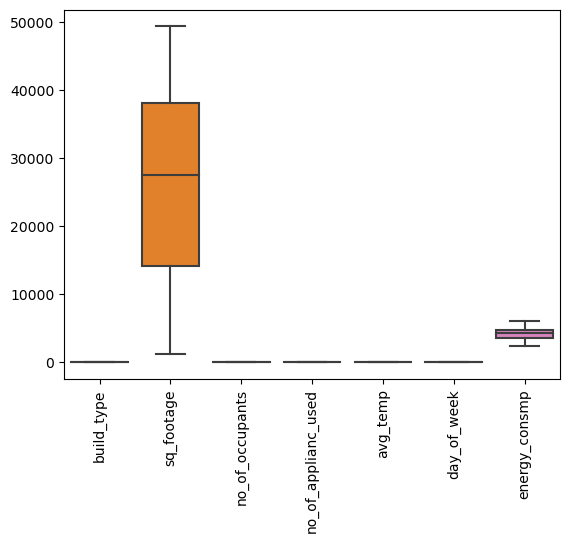

In [8]:
# finding outliers using boxplot from seaborn 

sns.boxplot(encoded_data)           
plt.xticks(rotation = 90)
plt.show()

### Statistical Analysis

In [9]:
print(data.describe(include='all'))
print(encoded_data.describe(include='all'))

         build_type    sq_footage  no_of_occupants  no_of_applianc_used  \
count           100    100.000000       100.000000           100.000000   
unique            3           NaN              NaN                  NaN   
top     Residential           NaN              NaN                  NaN   
freq             40           NaN              NaN                  NaN   
mean            NaN  25881.920000        47.230000            26.970000   
std             NaN  13711.075264        29.905526            14.237846   
min             NaN   1161.000000         2.000000             1.000000   
25%             NaN  14161.000000        21.000000            16.750000   
50%             NaN  27582.500000        47.000000            27.500000   
75%             NaN  38109.500000        73.000000            39.250000   
max             NaN  49354.000000        99.000000            49.000000   

          avg_temp day_of_week  energy_consmp  
count   100.000000         100      100.00000  
uni

#### Correlation

                     build_type  sq_footage  no_of_occupants  \
build_type                 1.00       -0.11            -0.00   
sq_footage                -0.11        1.00            -0.08   
no_of_occupants           -0.00       -0.08             1.00   
no_of_applianc_used        0.02       -0.15             0.03   
avg_temp                   0.06        0.03            -0.06   
day_of_week               -0.02       -0.20             0.01   
energy_consmp             -0.38        0.72             0.31   

                     no_of_applianc_used  avg_temp  day_of_week  energy_consmp  
build_type                          0.02      0.06        -0.02          -0.38  
sq_footage                         -0.15      0.03        -0.20           0.72  
no_of_occupants                     0.03     -0.06         0.01           0.31  
no_of_applianc_used                 1.00     -0.14        -0.07           0.18  
avg_temp                           -0.14      1.00        -0.14          -0.08  
d

<Axes: >

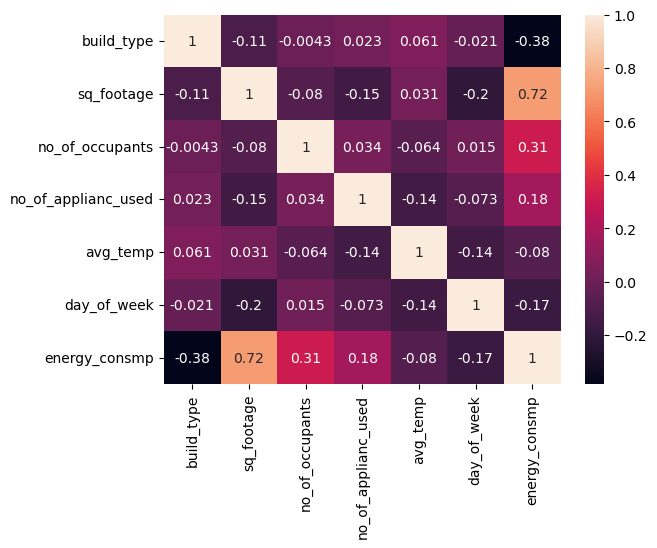

In [10]:
corre = encoded_data.corr(numeric_only=True)
print(np.around(corre, decimals = 2))

# plot
sns.heatmap(corre,annot=True)

#### Covariance

                     build_type    sq_footage  no_of_occupants  \
build_type                 0.65 -1.252340e+03            -0.10   
sq_footage             -1252.34  1.879936e+08        -32990.72   
no_of_occupants           -0.10 -3.299072e+04           894.34   
no_of_applianc_used        0.27 -2.848858e+04            14.61   
avg_temp                   0.34  2.920370e+03           -13.24   
day_of_week               -0.01 -1.384560e+03             0.22   
energy_consmp           -257.38  8.265118e+06          7683.41   

                     no_of_applianc_used  avg_temp  day_of_week  energy_consmp  
build_type                          0.27      0.34        -0.01        -257.38  
sq_footage                     -28488.58   2920.37     -1384.56     8265117.73  
no_of_occupants                    14.61    -13.24         0.22        7683.41  
no_of_applianc_used               202.72    -13.51        -0.52        2090.79  
avg_temp                          -13.51     48.41        -0.50   

<Axes: >

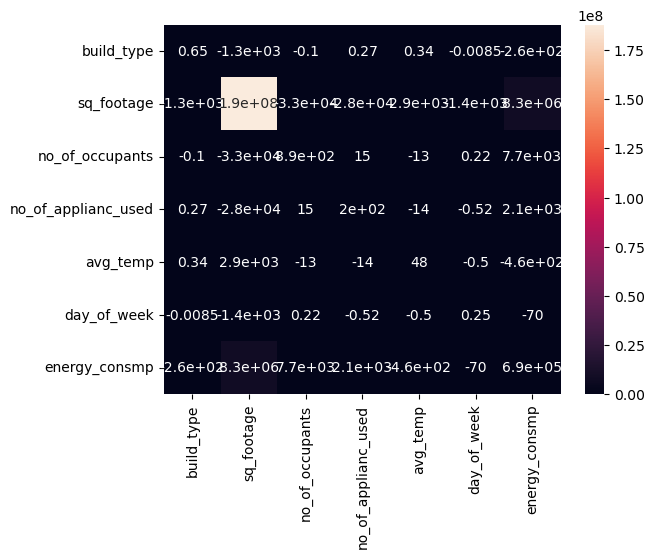

In [11]:
cova = encoded_data.cov(numeric_only=True)
print(np.around(cova, decimals = 2))

# plot
sns.heatmap(cova,annot=True)

### Extract Dependent and Independent Variables

In [12]:
x = encoded_data.iloc[:, 0:4]        # independent var
y = encoded_data['energy_consmp']    # dependent var

### Split Train and Test Data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Build Model

#### Scatter Plot

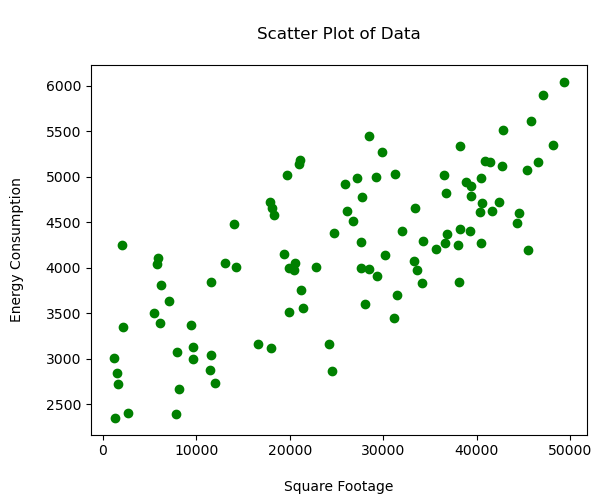

In [14]:
# plot graph
plt.scatter(encoded_data['sq_footage'], y, color="g")
plt.xlabel("\nSquare Footage")
plt.ylabel("Energy Consumption\n")
plt.title("\nScatter Plot of Data\n")
plt.show()

#### Using Linear Regression

In [15]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(x_train, y_train)

x_pred= model.predict(x_train)

# Predicting the test set result
y_pred = model.predict(x_test)

# To compare the actual output values for X_test with the predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.to_string())

     Actual    Predicted
26  4275.65  4354.567671
86  5016.11  4461.161427
2   5067.83  5245.212325
55  5014.79  4444.185930
75  3375.06  3700.271836
93  4250.29  3867.402939
16  4987.52  4497.767699
73  4510.20  4681.251445
54  3629.61  3209.734134
95  3010.81  3528.460948
53  3072.63  3396.357379
92  3830.68  4047.575009
78  3112.64  3273.443043
13  4991.64  5224.027626
7   2394.37  2705.616307
30  4779.08  4248.512570
22  5116.90  4535.069928
24  5508.64  4909.500890
33  3509.64  3919.985582
8   3969.09  3573.781887


#### Evaluating the Algorithm

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 372.52658838584597
Mean Squared Error: 163460.76336355414
Root Mean Squared Error: 404.30281147124634


#### Predicting r2 score

In [17]:
scorelr = r2_score(y_test,y_pred)
print("r2 score is ", scorelr*100,"%")

r2 score is  78.35862350349839 %


### Boosting

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

ad = AdaBoostRegressor()
ad.fit(x_train, y_train)

y_pred1 = gb.predict(x_test)
y_pred2 = xgb.predict(x_test)
y_pred3 = ad.predict(x_test)

scoregb = np.around(metrics.r2_score(y_test, y_pred1), decimals = 2)
print("Gradient boosting score is ", scoregb*100,"%")

scorexgb = np.around(metrics.r2_score(y_test, y_pred2), decimals = 2)
print("XGB boosting score is ", scorexgb*100,"%")

scoread = np.around(metrics.r2_score(y_test, y_pred3),decimals = 2)
print("Ada boosting score is ", scoread*100,"%")

Gradient boosting score is  92.0 %
XGB boosting score is  87.0 %
Ada boosting score is  81.0 %


### Model Performance Comparison Graph 

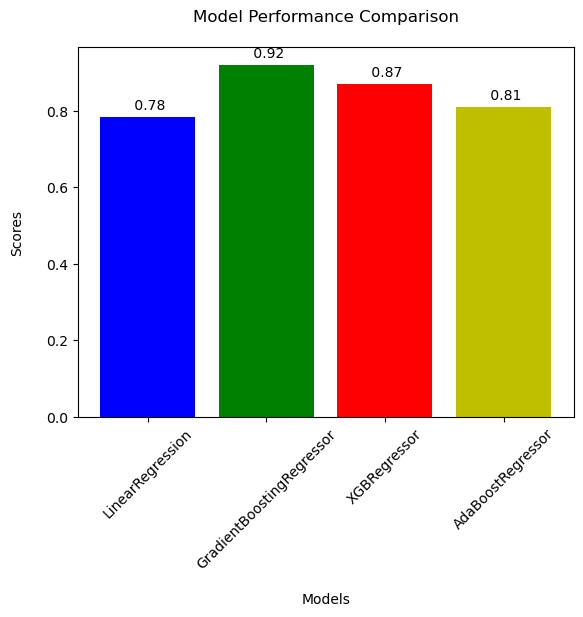

In [19]:
# plot

models = ['LinearRegression', 'GradientBoostingRegressor', 'XGBRegressor', 'AdaBoostRegressor']
scores = [scorelr, scoregb, scorexgb, scoread]
plt.bar(models, scores, color = ['b','g','r','y'])
plt.title('Model Performance Comparison\n')
plt.xlabel('\nModels')
plt.ylabel('Scores\n')
plt.xticks(rotation = 45)
for i, score in enumerate(scores):
    plt.text(i, score+ 0.02, f'{score: 0.2f}', ha = 'center')
plt.show()

### The best performance is by the Gradient Boosting Regressor Model predicting an accuracy score of 92%.